<a href="https://colab.research.google.com/github/maxmaxine825/MSSP607/blob/main/Week_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
uploaded = files.upload()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('InternetSales.csv', encoding='latin1')

/tmp/ipython-input-78690348.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('InternetSales.csv', encoding='latin1')


In [32]:
df.head()

,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,5/3/2013,5/15/2013,5/10/2013


In [33]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['Year'] = df['OrderDate'].dt.year
yearly_sales = df.groupby('Year')['SalesAmount'].sum().reset_index()
print(yearly_sales)

   Year   SalesAmount
0  2010  4.342104e+04
1  2011  7.075526e+06
2  2012  5.842485e+06
3  2013  1.635155e+07
4  2014  4.569472e+04


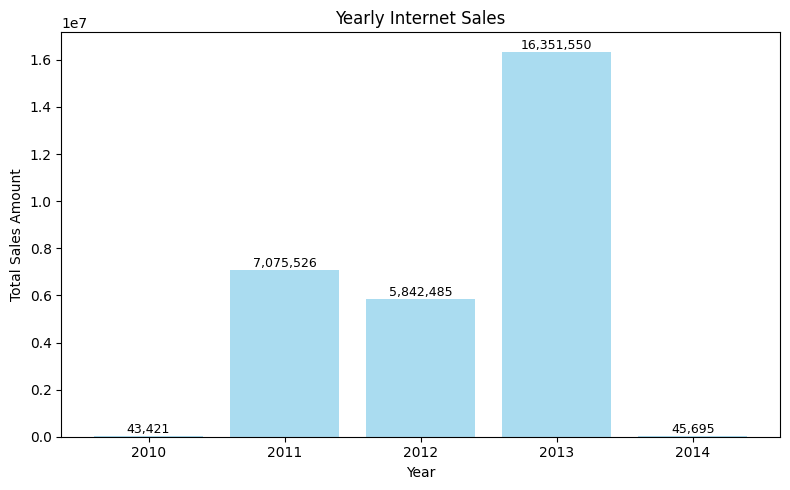

In [34]:
plt.figure(figsize=(8,5))
bars = plt.bar(yearly_sales['Year'], yearly_sales['SalesAmount'], color='skyblue', alpha=0.7)
plt.title('Yearly Internet Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('Yearly_Sales_Labeled.pdf')
plt.show()